<a href="https://colab.research.google.com/github/benuklemi/my_3mtt/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.shape

(100000, 9)

#Display the first 5 rows of the data

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# **Cleaning the dataset:**

Address missing values, remove duplicates, and standardize date and location formats.

In [ ]:
df.duplicated().sum()

3854

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Finding null values
print('Finding null values')
print(df.isnull().sum())
print()
print('Finding if any cell with not valaible/applicable')

print(df.notna().sum())

Finding null values
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Finding if any cell with not valaible/applicable
gender                 96146
age                    96146
hypertension           96146
heart_disease          96146
smoking_history        96146
bmi                    96146
HbA1c_level            96146
blood_glucose_level    96146
diabetes               96146
dtype: int64


**Encoding Categorical Variables**

In [ ]:
data = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


**Standardize and Normalize Numerical Features:**

Use normalization or scaling to bring all features to a similar scale (important for distance-based models like logistic regression or neural networks).



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(data[['HbA1c_level', 'blood_glucose_level']])

**Exploratory Data Analysis (EDA)**

*Outcome Distribution:*

Analyze the distribution of the target variable diabetes to understand class imbalance. If there is a significant imbalance, then we consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) later in modeling.

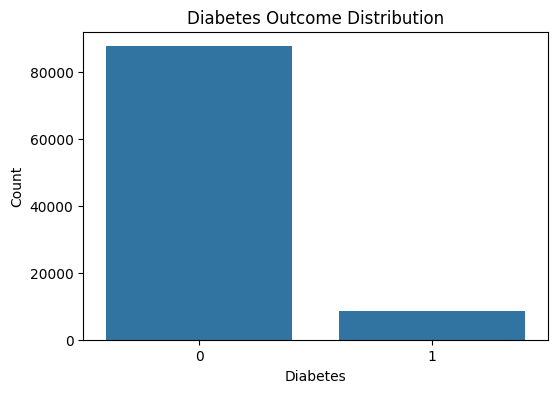

In [ ]:
# Import seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a count plot for the diabetes variable
plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
sns.countplot(x='diabetes', data=data)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()


##Chart Explanation:
##

This chart represents the distribution of the Diabetes outcome in the dataset. Here's a detailed analysis:

The X-axis: Represents the binary outcomes of the Diabetes variable, where 0 - Indicates the absence of diabetes. And 1 - Indicates the presence of diabetes.


The Y-axis: Represents the count of observations for each outcome.


**Observation:**
The majority of the data points fall under the 0 category (non-diabetic cases). A smaller portion falls under the 1 category (diabetic cases).

**Analysis:**
There is a significant class imbalance, with non-diabetic cases (0) being much more frequent than diabetic cases (1). Imbalanced datasets can affect the performance of machine learning models, especially classification algorithms, as they may become biased towards the majority class.


**Implications for the Modeling:**

Evaluation Metrics:

Avoid relying solely on accuracy as a metric since a model could achieve high accuracy by predicting all cases as 0.

Use metrics like precision, recall, F1-score, and the area under the ROC curve (AUCROC) to evaluate model performance.


Resampling Techniques:

There is need to Apply oversampling methods (e.g., SMOTE) to increase the number of diabetic cases. While we can Use undersampling methods to reduce the number of non-diabetic cases, we should Consider a combination of both for balanced representation.



**Health Insights:**

The lower prevalence of diabetes may reflect the dataset’s population. However, this could vary significantly based on demographic factors such as age, lifestyle, or geographic location.

**Correlation Analysis:**

Check correlations between numerical features and diabetes. HbA1c_level and blood_glucose_level are typically strong indicators of diabetes, so we would expect these to show higher correlations.

<Axes: >

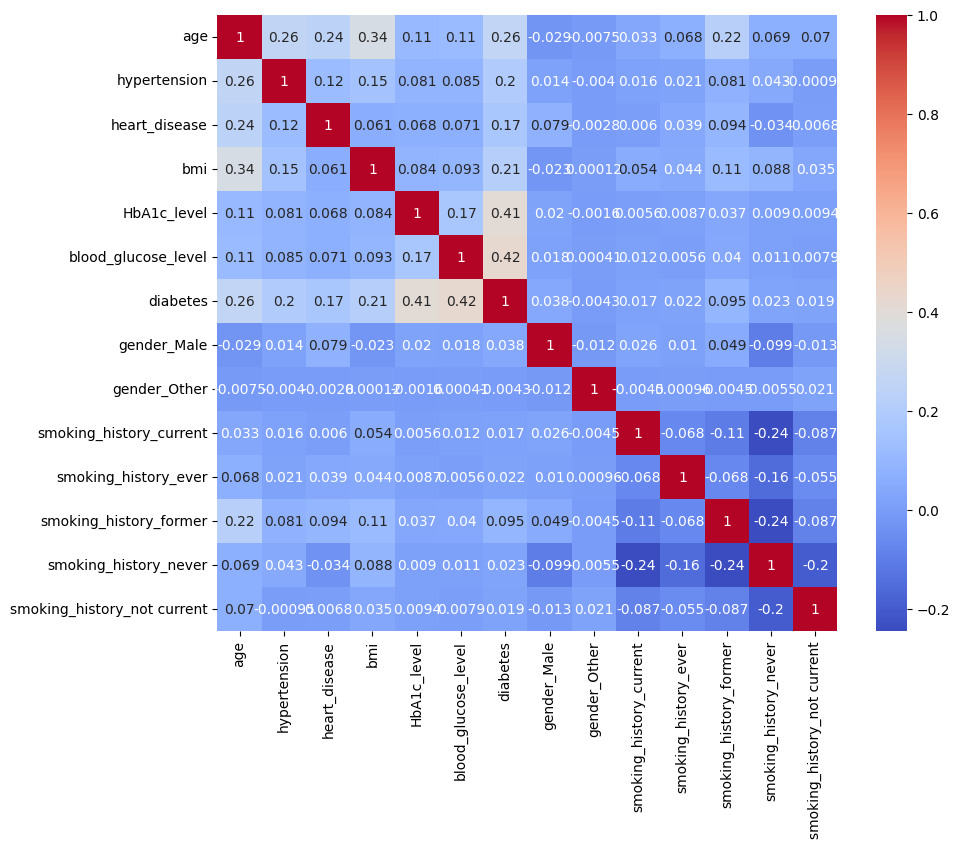

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

This is a correlation heatmap that visually represents the correlation coefficients between various features of a dataset.

Key Observations:

The diagonal values are all 1.0 because each variable is perfectly correlated with itself.


Blood Glucose Level & Diabetes (0.42) shows a moderately strong correlation, indicating that higher blood glucose levels are associated with diabetes.

HbA1c Level & Diabetes (0.41): HbA1c levels are also moderately correlated with diabetes, reflecting its importance as a diabetes indicator.

BMI & Age (0.34): Indicates a moderate relationship where BMI tends to increase with age.


**Low or No Correlation:**

Variables like gender (e.g., gender_Male) and smoking history categories have very weak correlations with other features, suggesting limited influence in this dataset.


**Negative Correlations:**

Some smoking history categories (e.g., smoking_history_ever) have weak negative correlations with other features, indicating slight inverse relationships.

Among smoking categories, there is minimal correlation with health indicators like diabetes, suggesting limited direct impact in this dataset.

**Gender:**

The gender variables (gender_Male, gender_Other) show little to no correlation with health variables such as diabetes or heart_disease, implying gender has limited impact in this dataset.


##Potential Insights:##

Health Risk Factors: Age, blood glucose levels, and HbA1c levels are key factors associated with diabetes and other health indicators like BMI.

Smoking History: Appears less influential in this dataset, but deeper analysis might reveal specific patterns.

Target Variables: Features like blood glucose level and HbA1c level could be prioritized in predictive models for diabetes.

**Relationship Analysis:**

Box Plots for Numerical Variables: Visualize distributions of HbA1c_level, blood_glucose_level, and BMI for diabetic vs. non-diabetic cases.

Count Plots for Categorical Variables: Visualize gender, hypertension, heart_disease, and smoking_history distributions in diabetic vs. non-diabetic cases.


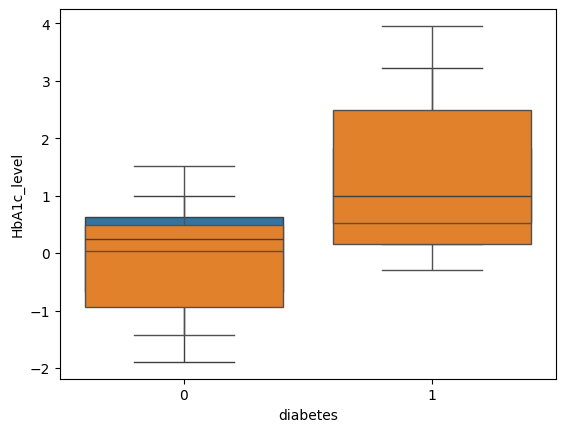

In [ ]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)

print('Count Plots for Categorical Variables: Visualize gender, hypertension, heart_disease, and smoking_history distributions in diabetic vs. non-diabetic cases.')

This boxplot represents the relationship between HbA1c_level and the binary diabetes outcome. Here's a detailed analysis:

1. Median (Middle Line): Indicates the median HbA1c level for each group.

2. Interquartile Range (Box): Shows the middle 50% of HbA1c levels.

3. Whiskers: Represent the range of most data points, excluding outliers.


**Analysis:**

1. HbA1c Levels by Diabetes Status:

Individuals with diabetes (1) have significantly higher HbA1c levels compared to non-diabetic individuals (0).

The median HbA1c level is visibly higher for the diabetic group, indicating chronic hyperglycemia in these individuals.



2. Distribution Spread:

The interquartile range (IQR) and overall spread are larger for the diabetic group, suggesting greater variability in HbA1c levels among diabetics.

Non-diabetic individuals exhibit a more compact distribution of HbA1c levels, indicating less variation.



3. Overlap and Outliers:

There is minimal overlap in the HbA1c levels between the two groups, implying HbA1c could serve as a strong predictor of diabetes.

Outliers in both groups suggest some individuals have unusually high or low HbA1c levels that deviate from the typical range.

High HbA1c levels are strongly associated with diabetes, making it an essential diagnostic and monitoring tool.

Outliers in the diabetic group may represent poorly controlled diabetes or rare physiological conditions.


2. Predictive Modeling:

HbA1c_level appears to be a critical feature for predicting diabetes in a machine learning model.

The lack of significant overlap between groups suggests high predictive power.

##Feature Importance Analysis:

Using tree-based models like Random Forest, calculate feature importances to assess the contribution of each feature to diabetes prediction. This can guide feature selection and model simplification.

<Axes: >

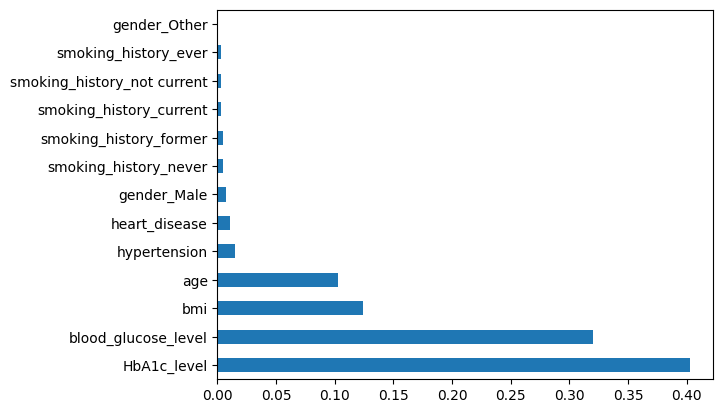

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop(columns='diabetes')
y = data['diabetes']
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='barh')

In [ ]:
# prompt: 3. Feature Selection
# From the EDA, we can identify which features strongly correlate with diabetes. Based on domain knowledge, HbA1c_level and blood_glucose_level are critical, while hypertension, BMI, and heart_disease also likely play roles. Drop any features that show minimal relevance.

# Based on the EDA and feature importance plot, we'll keep the most relevant features.
#  'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'BMI', 'hypertension', 'heart_disease', and 'smoking_history_never' seem to be the most important.

selected_features = ['HbA1c_level', 'blood_glucose_level', 'gender_Male', 'bmi', 'hypertension', 'heart_disease', 'smoking_history_never', 'diabetes']
data_selected = data[selected_features]

#Now data_selected contains only the selected features, ready for the next step (Splitting the dataset)
data_selected

,HbA1c_level,blood_glucose_level,gender_Male,bmi,hypertension,heart_disease,smoking_history_never,diabetes
0,0.994563,0.043554,False,25.19,0,1,True,0
1,0.994563,-1.423096,False,27.32,0,0,False,0
2,0.155970,0.483549,True,27.32,0,0,True,0
3,-0.496269,0.410216,False,23.45,0,0,False,0
4,-0.682623,0.410216,True,20.14,1,1,False,0
...,...,...,...,...,...,...,...,...
99994,-0.682623,0.165775,False,24.60,0,0,False,0
99996,0.901386,-0.934213,False,17.37,0,0,False,0
99997,0.155970,0.410216,True,27.83,0,0,False,0
99998,-1.428039,-0.934213,False,35.42,0,0,True,0


##Model Development
***For diabetes prediction, try multiple models and evaluate their performances to identify the best approach. Here’s a breakdown:***


**Train-Test Split:**

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='diabetes')
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Handling Class Imbalance (if necessary):

*If there’s a significant imbalance in the target class, use SMOTE to oversample the minority class in the training set.*

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} - Classification Report")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17509
           1       0.45      0.86      0.59      1721

    accuracy                           0.89     19230
   macro avg       0.72      0.88      0.77     19230
weighted avg       0.94      0.89      0.91     19230

ROC AUC Score: 0.8809046623287188
Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.81      0.73      0.77      1721

    accuracy                           0.96     19230
   macro avg       0.89      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230

ROC AUC Score: 0.855960903845284
XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.93      0.71      0.80      1721

 

##Implement cross-validation to validate model stability and avoid overfitting:

In [ ]:

from sklearn.model_selection import cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print()
    print()
    print(f'{name}: Mean AUC = {scores.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



Logistic Regression: Mean AUC = 0.9695203404867871


Random Forest: Mean AUC = 0.997654280808644


XGBoost: Mean AUC = 0.9970513025666854


## Using GridSearchCV or RandomizedSearchCV for hyperparameter optimization:

In [ ]:

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'{name} Report:\n', classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     17509
           1       0.45      0.86      0.59      1721

    accuracy                           0.89     19230
   macro avg       0.72      0.88      0.77     19230
weighted avg       0.94      0.89      0.91     19230

Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.80      0.73      0.76      1721

    accuracy                           0.96     19230
   macro avg       0.89      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230

XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.93      0.71      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.85      0.89     19230
weigh

##Evaluate on Test Data

Assessing performance on the test set

In [ ]:

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'{name} Report:\n', classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     17509
           1       0.45      0.86      0.59      1721

    accuracy                           0.89     19230
   macro avg       0.72      0.88      0.77     19230
weighted avg       0.94      0.89      0.91     19230

Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.80      0.73      0.76      1721

    accuracy                           0.96     19230
   macro avg       0.89      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230

XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.93      0.71      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.85      0.89     19230
weigh

##Feature Importance Visualization

Use feature importance from tree-based models to refine feature selection:

Text(0.5, 1.0, 'Feature Importance')

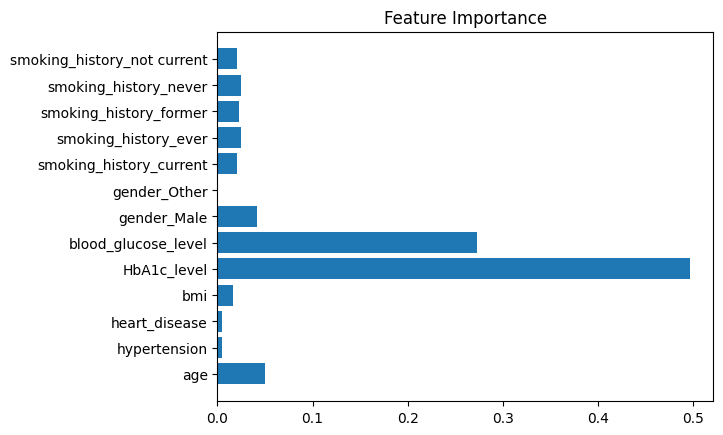

In [ ]:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title('Feature Importance')

Additional Enhancements

Pipeline Implementation: Automate preprocessing and modeling steps using Pipeline from sklearn.

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

##Saving the Best Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load data
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save model
import joblib
joblib.dump(best_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

Thanks